# Read the data

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/ housing.csv'
housing = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Understand the Data

🏠 About the California Housing Dataset:
- This dataset is based on housing data collected in the 1990s from California districts.
- Each row represents a district (not an individual house), and each column describes features about the district.
---
🎯 Goal of the Project
- We are trying to predict the median house value for a district based on various features like location, population, and income.
- This is a regression problem, because the target is a continuous numerical value.
---
📊 Features Description

| Feature              | Description                                                                                         |
| -------------------- | --------------------------------------------------------------------------------------------------- |
| `longitude`          | Longitude of the district (geographical coordinate)                                                 |
| `latitude`           | Latitude of the district (geographical coordinate)                                                  |
| `housing_median_age` | Median age of houses in the district                                                                |
| `total_rooms`        | Total number of rooms in all houses in the district                                                 |
| `total_bedrooms`     | Total number of bedrooms in all houses                                                              |
| `population`         | Total population in the district                                                                    |
| `households`         | Total number of households (groups of people living together)                                       |
| `median_income`      | Median income of residents in the district (in tens of thousands of dollars)                        |
| `median_house_value` | 🟡 **Target column** — the median value of homes in the district                                    |
| `ocean_proximity`    | Categorical feature indicating how close the district is to the ocean (`<1H OCEAN`, `INLAND`, etc.) |


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Quick Data Preview


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


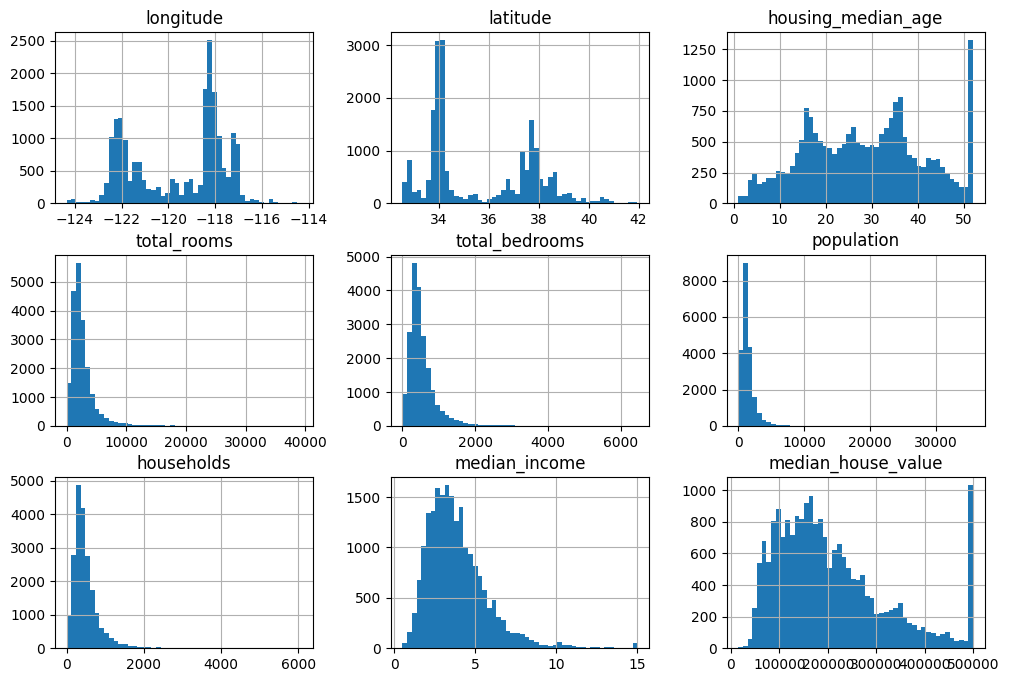

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8));

1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:
  - Collect proper labels for the districts whose labels were capped.
  - Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond 500,000).

3. These attributes have very different scales. We will discuss this later in this chapter, when we explore feature scaling.

4. Finally, many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more symmetrical and bell-shaped distributions.

# Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Stratified

In [ ]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Text(0, 0.5, 'Number of districts')

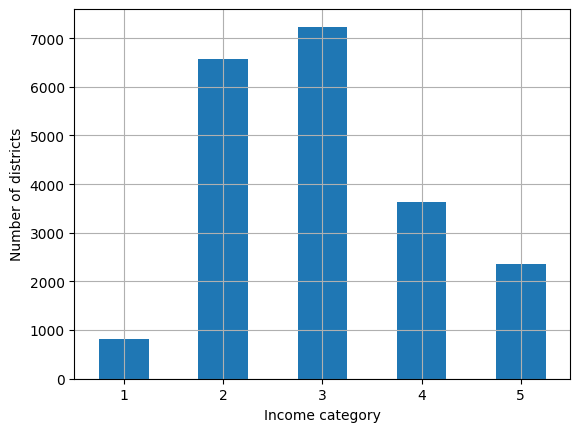

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [ ]:
stratify_train_set, stratify_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

stratify_train_set["income_cat"].value_counts() / len(stratify_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


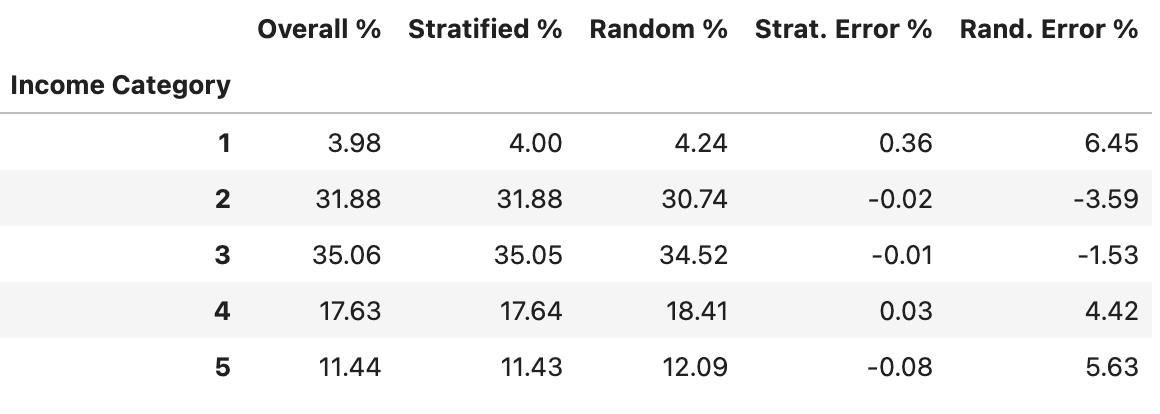

# Visualize Features

In [ ]:
housing = stratify_train_set.copy()

### Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

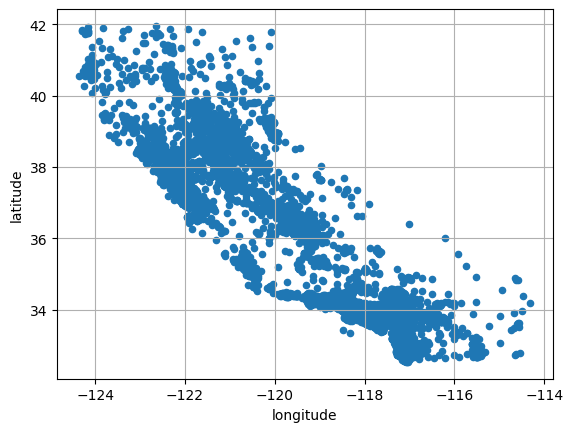

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

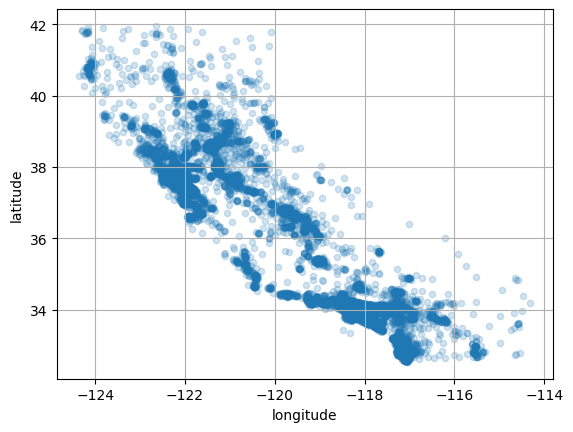

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

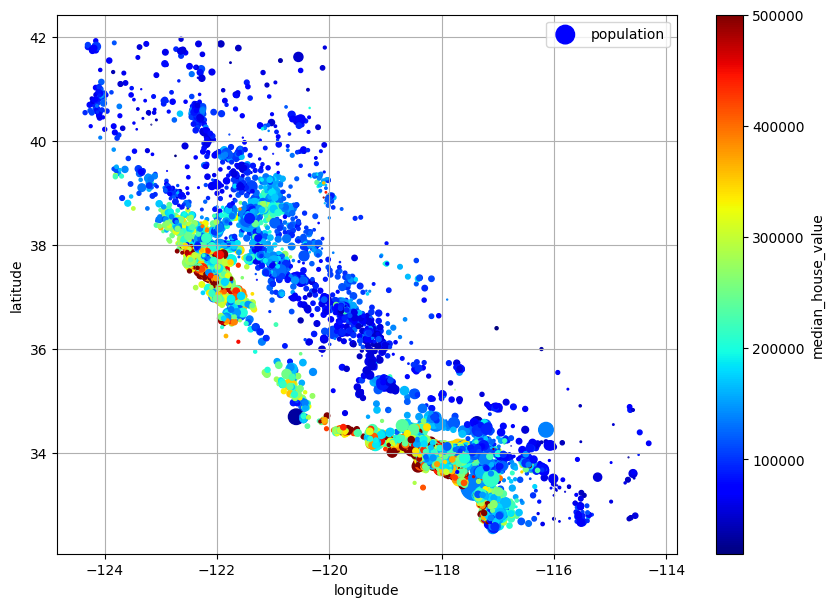

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

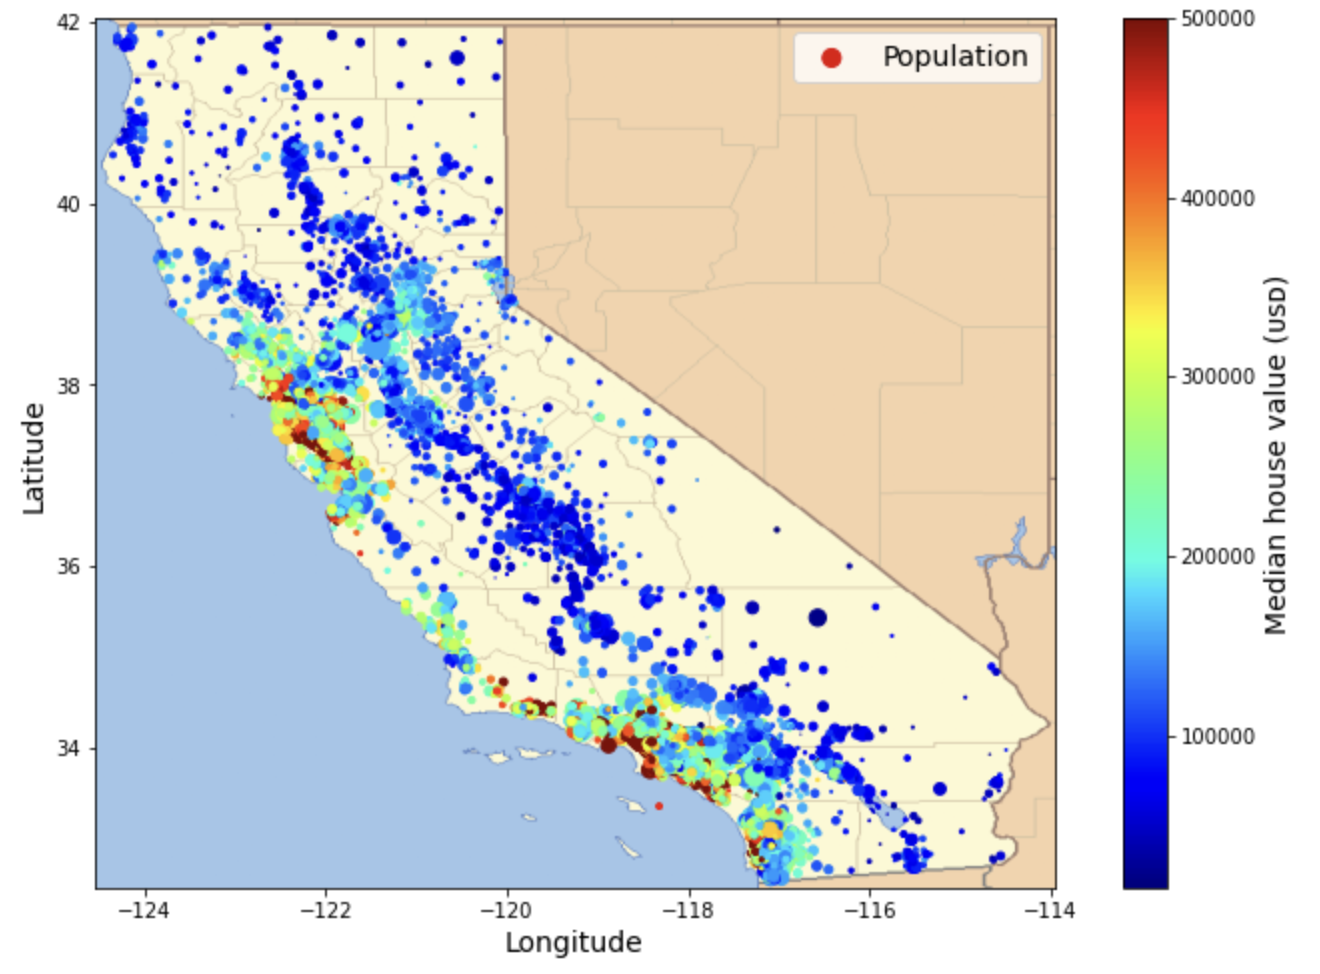

# Explore Relationships

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


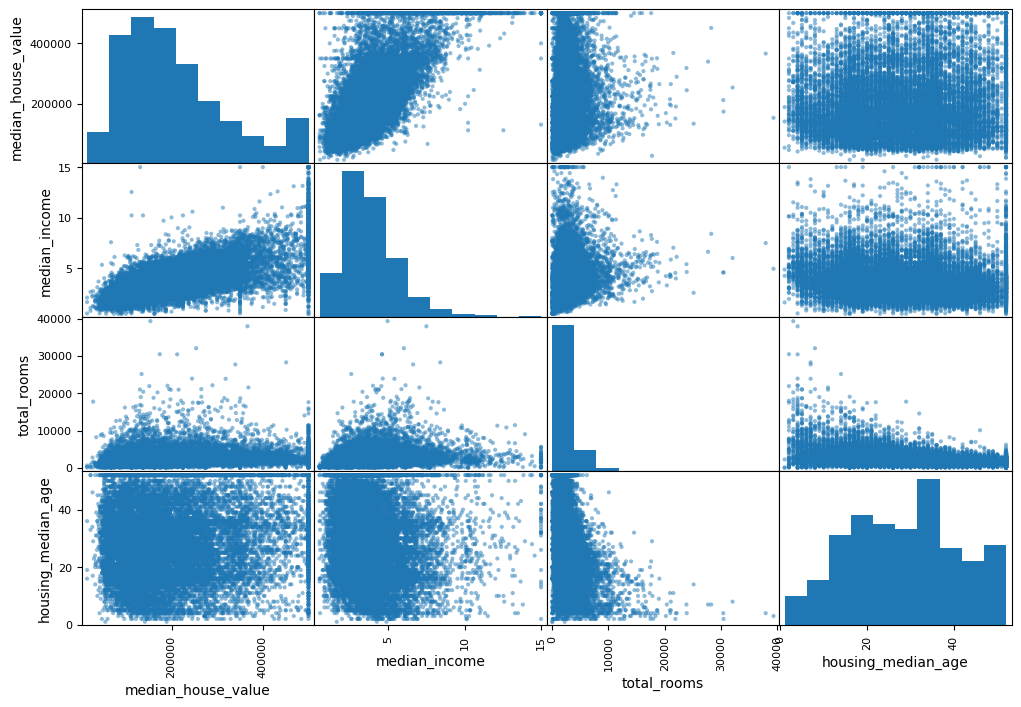

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

<Axes: xlabel='median_income', ylabel='median_house_value'>

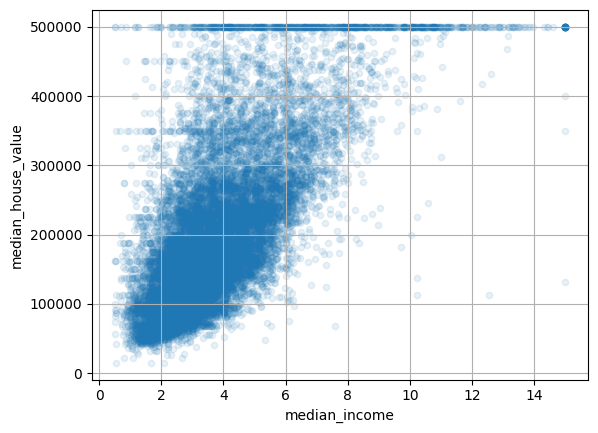

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)

# Extract Features


In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_house,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
people_per_house,-0.021991
population,-0.026882
longitude,-0.047466


# Prepare the Data for Machine Learning Algorithms

# Handle Missing Data

In [ ]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,people_per_house
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY,2,4.707668,1.317891
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,177000.0,<1H OCEAN,3,4.537074,3.947896
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,146500.0,<1H OCEAN,3,5.826196,2.403023
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,214800.0,<1H OCEAN,3,4.448980,2.840136
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,5,6.835417,2.385417


In [ ]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,people_per_house


In [ ]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,people_per_house
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,85000.0,NEAR BAY,2,4.707668,1.317891
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,177000.0,<1H OCEAN,3,4.537074,3.947896
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,146500.0,<1H OCEAN,3,5.826196,2.403023
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,214800.0,<1H OCEAN,3,4.448980,2.840136
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,5,6.835417,2.385417


In [ ]:
train_median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(train_median, inplace=True)

/tmp/ipython-input-1710692320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(train_median, inplace=True)


# Handling Text and Categorical Attributes


In [ ]:
housing['ocean_proximity']

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [ ]:
housing['ocean_proximity'].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

### OneHotEncoder

In [ ]:
pd.get_dummies(housing['ocean_proximity'], dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


### LabelEncoder

In [ ]:
ocean_map = {
    'INLAND': 0,
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}

housing['ocean_proximity'].map(ocean_map)

,ocean_proximity
12655,0
15502,3
2908,0
14053,3
20496,2
...,...
15174,2
12661,0
19263,2
19140,2


In [ ]:
housing = pd.get_dummies(housing, columns=['ocean_proximity'], dtype=int)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2,5.485836,3.168555,0,1,0,0,0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5,6.927083,2.623698,0,0,0,0,1
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2,5.393333,2.223333,0,1,0,0,0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2,3.886128,1.859213,0,0,0,0,1
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3,6.096552,3.167241,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4,6.658342,2.023976,1,0,0,0,0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2,5.571932,3.363188,0,1,0,0,0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3,4.110465,2.662791,1,0,0,0,0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3,6.297405,2.411178,1,0,0,0,0


# Scale Features

In [ ]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

housing_num_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income',
                'rooms_per_house', 'people_per_house']

### MinMaxScaler

In [ ]:
(X[housing_num_col] - X[housing_num_col].min()) / (X[housing_num_col].max() - X[housing_num_col].min())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,people_per_house
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.030938,0.001993
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.041176,0.001554
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.030281,0.001232
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.019575,0.000939
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.035276,0.001992
...,...,...,...,...,...,...,...,...,...,...
15174,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.039267,0.001072
12661,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.031550,0.002149
19263,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.021168,0.001586
19140,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.036703,0.001383


### StandardScaler

In [ ]:
train_mean = X[housing_num_col].mean()
train_std = X[housing_num_col].std()

X[housing_num_col] = (X[housing_num_col] - train_mean) / train_std
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_house,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941322,1.347397,0.027563,0.584760,0.640352,0.732580,0.556269,-0.893620,2,0.017395,0.006222,0,1,0,0,0
15502,1.171747,-1.192404,-1.721965,1.261428,0.781538,0.533595,0.721296,1.292129,5,0.569238,-0.040810,0,0,0,0,1
2908,0.267573,-0.125968,1.220423,-0.469759,-0.545122,-0.674655,-0.524391,-0.525418,2,-0.018024,-0.075369,0,1,0,0,0
14053,1.221701,-1.351433,-0.370057,-0.348641,-0.036366,-0.467603,-0.037296,-0.865903,2,-0.595122,-0.106800,0,0,0,0,1
20496,0.437418,-0.635799,-0.131485,0.427167,0.272782,0.374049,0.220892,0.325742,3,0.251234,0.006109,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251674,-1.220468,-1.165297,1.890398,1.696811,0.543455,1.341478,0.637354,4,0.466339,-0.092577,1,0,0,0,0
12661,-0.921340,1.342720,-1.085773,2.468396,2.161750,3.002083,2.451418,-0.557492,2,0.050361,0.023023,0,1,0,0,0
19263,-1.570747,1.309979,1.538519,-0.895775,-0.895652,-0.861987,-0.865092,-0.365464,3,-0.509225,-0.037435,1,0,0,0,0
19140,-1.560756,1.249173,-1.165297,0.248997,0.112122,-0.189741,0.010615,0.168256,3,0.328139,-0.059154,1,0,0,0,0


### Select Useful Features

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_house,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941322,1.347397,0.027563,0.584760,0.640352,0.732580,0.556269,-0.893620,2,0.017395,0.006222,0,1,0,0,0
15502,1.171747,-1.192404,-1.721965,1.261428,0.781538,0.533595,0.721296,1.292129,5,0.569238,-0.040810,0,0,0,0,1
2908,0.267573,-0.125968,1.220423,-0.469759,-0.545122,-0.674655,-0.524391,-0.525418,2,-0.018024,-0.075369,0,1,0,0,0
14053,1.221701,-1.351433,-0.370057,-0.348641,-0.036366,-0.467603,-0.037296,-0.865903,2,-0.595122,-0.106800,0,0,0,0,1
20496,0.437418,-0.635799,-0.131485,0.427167,0.272782,0.374049,0.220892,0.325742,3,0.251234,0.006109,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251674,-1.220468,-1.165297,1.890398,1.696811,0.543455,1.341478,0.637354,4,0.466339,-0.092577,1,0,0,0,0
12661,-0.921340,1.342720,-1.085773,2.468396,2.161750,3.002083,2.451418,-0.557492,2,0.050361,0.023023,0,1,0,0,0
19263,-1.570747,1.309979,1.538519,-0.895775,-0.895652,-0.861987,-0.865092,-0.365464,3,-0.509225,-0.037435,1,0,0,0,0
19140,-1.560756,1.249173,-1.165297,0.248997,0.112122,-0.189741,0.010615,0.168256,3,0.328139,-0.059154,1,0,0,0,0


In [ ]:
X.drop(['ocean_proximity_NEAR OCEAN', 'income_cat'], axis=1, inplace=True)

# Train and Validate Your First Model


# Train different Models


In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
12655,-0.941322,1.347397,0.027563,0.584760,0.640352,0.732580,0.556269,-0.893620,0.017395,0.006222,0,1,0,0
15502,1.171747,-1.192404,-1.721965,1.261428,0.781538,0.533595,0.721296,1.292129,0.569238,-0.040810,0,0,0,0
2908,0.267573,-0.125968,1.220423,-0.469759,-0.545122,-0.674655,-0.524391,-0.525418,-0.018024,-0.075369,0,1,0,0
14053,1.221701,-1.351433,-0.370057,-0.348641,-0.036366,-0.467603,-0.037296,-0.865903,-0.595122,-0.106800,0,0,0,0
20496,0.437418,-0.635799,-0.131485,0.427167,0.272782,0.374049,0.220892,0.325742,0.251234,0.006109,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251674,-1.220468,-1.165297,1.890398,1.696811,0.543455,1.341478,0.637354,0.466339,-0.092577,1,0,0,0
12661,-0.921340,1.342720,-1.085773,2.468396,2.161750,3.002083,2.451418,-0.557492,0.050361,0.023023,0,1,0,0
19263,-1.570747,1.309979,1.538519,-0.895775,-0.895652,-0.861987,-0.865092,-0.365464,-0.509225,-0.037435,1,0,0,0
19140,-1.560756,1.249173,-1.165297,0.248997,0.112122,-0.189741,0.010615,0.168256,0.328139,-0.059154,1,0,0,0


In [ ]:
y

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# 2. Support Vector Regressor
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X, y)

SVR(C=10)

In [ ]:
# 3. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

# How to Evaluate Regression Models


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
lin_pred = lin_reg.predict(X)

lin_rmse = np.sqrt(mean_squared_error(y, lin_pred))
lin_mae = mean_absolute_error(y, lin_pred)

print("Linear Regression:")
print("  RMSE:", round(lin_rmse, 2))
print("  MAE :", round(lin_mae, 2))

Linear Regression:
  RMSE: 68911.35
  MAE : 49871.48


In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import KFold, train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# import numpy as np

# # 1. Load data
# X, y = load_iris(return_X_y=True)

# # 2. Hold-out test set
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. Manual cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# val_scores = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full)):
#     print(f"Fold {fold+1}")

#     # Split fold
#     X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
#     y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

#     # Define fresh pipeline in each fold (no leakage!)
#     pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy='mean')),
#         ('scaler', StandardScaler()),
#         ('classifier', RandomForestClassifier(random_state=42))
#     ])

#     # Fit on training fold
#     pipeline.fit(X_train, y_train)

#     # Evaluate on validation fold
#     y_val_pred = pipeline.predict(X_val)
#     acc = accuracy_score(y_val, y_val_pred)
#     val_scores.append(acc)
#     print(f"  Validation accuracy: {acc:.4f}")

# # 4. Average CV accuracy
# print("\nCross-validation accuracy per fold:", val_scores)
# print("Mean CV accuracy:", np.mean(val_scores))

# # 5. Final training on full training set
# final_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])
# final_pipeline.fit(X_train_full, y_train_full)

# # 6. Test set evaluation
# y_test_pred = final_pipeline.predict(X_test)
# test_acc = accuracy_score(y_test, y_test_pred)
# print(f"\nTest set accuracy: {test_acc:.4f}")

In [ ]:
svr_pred = svr.predict(X)

svr_rmse = np.sqrt(mean_squared_error(y, svr_pred))
svr_mae = mean_absolute_error(y, svr_pred)

print("Support Vector Regressor:")
print("  RMSE:", round(svr_rmse, 2))
print("  MAE :", round(svr_mae, 2))

Support Vector Regressor:
  RMSE: 115407.98
  MAE : 85001.28


In [ ]:
rf_pred = rf.predict(X)

rf_rmse = np.sqrt(mean_squared_error(y, rf_pred))
rf_mae = mean_absolute_error(y, rf_pred)

print("Random Forest Regressor:")
print("  RMSE:", round(rf_rmse, 2))
print("  MAE :", round(rf_mae, 2))

Random Forest Regressor:
  RMSE: 18668.79
  MAE : 12099.35


# Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=5)

rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE scores (5 folds):")
print(rmse_scores)

print("Average RMSE:", round(rmse_scores.mean(), 2))

Cross-Validation RMSE scores (5 folds):
[68521.05614624 68257.89278934 70117.68698455 70063.37444589
 68796.26825554]
Average RMSE: 69151.26


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=5)

rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE scores (5 folds):")
print(rmse_scores)

print("Average RMSE:", round(rmse_scores.mean(), 2))

Cross-Validation RMSE scores (5 folds):
[50344.2817785  49898.90135155 49700.51448295 51988.71951264
 51567.64207743]
Average RMSE: 50700.01


# Fine-Tune and Evaluate the Best Model

# Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV( # This grid will train 3 × 3 × 2 × 2 = 36 models
    rf,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-grid_search.best_score_))

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Score (RMSE): 60428.163985550294


# Random Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 151),          # Random integers between 50 and 150
    'max_depth': randint(2, 7),                # Random integers between 2 and 6
    'min_samples_split': randint(2, 6),        # 2 to 5
    'min_samples_leaf': randint(1, 4)          # 1 or 3
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 132}
Best Score (RMSE): 60485.9336890161


# Feature Importances


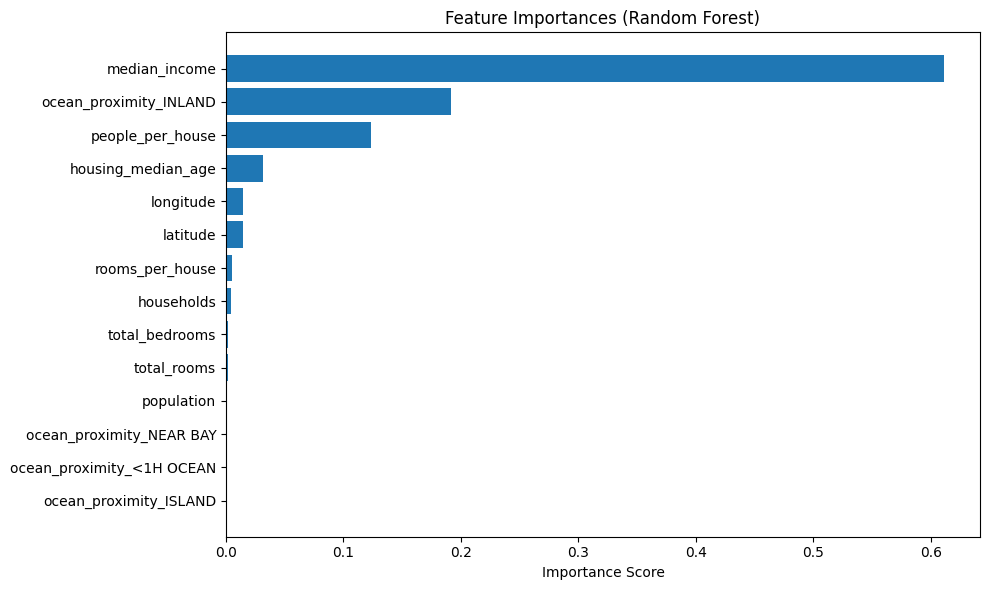

In [ ]:
best_rf = random_search.best_estimator_

importances = best_rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Final Evaluation on Test Set


In [ ]:
final_test = stratify_test_set.copy()
final_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [ ]:
final_test["rooms_per_house"] = final_test["total_rooms"] / final_test["households"]
final_test["people_per_house"] = final_test["population"] / final_test["households"]

final_test["total_bedrooms"].fillna(train_median, inplace=True)

final_test = pd.get_dummies(final_test, columns=['ocean_proximity'], dtype=int)

final_test.drop(['ocean_proximity_NEAR OCEAN', 'income_cat'], axis=1, inplace=True, errors='ignore')

X_test = final_test.drop('median_house_value', axis=1)
y_test = final_test['median_house_value']

housing_num_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',
                   'rooms_per_house', 'people_per_house']

X_test[housing_num_col] = (X_test[housing_num_col] - train_mean) / train_std

X_test.head()

/tmp/ipython-input-1821205388.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_test["total_bedrooms"].fillna(train_median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
5241,0.592276,-0.710637,0.027563,1.788454,1.163713,0.685075,1.232347,2.312796,0.488272,-0.070909,1,0,0,0
17352,-0.421797,-0.350481,-0.370057,-0.281769,-0.552424,-0.506145,-0.569641,0.595306,0.649924,-0.006497,1,0,0,0
3505,0.562304,-0.649831,0.584231,-0.546918,-0.642491,-0.548273,-0.590934,0.266685,-0.060026,-0.013663,1,0,0,0
7777,0.737144,-0.808861,0.504707,-0.453391,-0.508608,-0.311642,-0.521730,-0.317641,0.019638,0.040138,1,0,0,0
14155,1.251674,-1.342079,0.743279,0.540802,0.194886,0.067505,0.311390,0.250411,0.273507,-0.057111,0,0,0,0


In [ ]:
final_model = random_search.best_estimator_

test_preds = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Final RMSE on Test Set:", round(test_rmse, 2))

Final RMSE on Test Set: 58997.41
